In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load the dataset
data = pd.read_csv('ENERGY_STAR_Certified_Data_Center_Storage_-_Block_I_O_20241202.csv')


In [5]:
# Overview of the dataset
print("Dataset Overview:")
display(data.info())
display(data.describe())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Columns: 114 entries, ENERGY STAR Unique ID to CB Model Identifier
dtypes: float64(54), int64(1), object(59)
memory usage: 54.5+ KB


None

,ENERGY STAR Unique ID,UPC,Trans Total Amount of Cache (GB),Trans Ratio Devices Mixed Optimal Point,Trans Installed Solid State Devices in Optimal Point,Trans Installed Rotational Devices in Optimal Point,Trans Num of Controllers in Optimal Point,Trans Num Redundant Controllers Optimal Point,Trans Number of PSUs Optimal Point,Trans Number of Redundant PSUs Optimal Point,...,Stream Num Devices Storage Device 1 Optimal Point,Stream Device 1 Optimal Point Seq Read Wrkld Test (MiBPS/W),Stream Device 1 Optimal Point Seq Write Wrkld Test (MiBPS/W),Stream Device 1 Optimal Point Ready Idle Wrkld Test (GB/W),Stream Storage Device 2 Rated Speed (RPM),Stream Storage Device 2 Raw Capacity (GB),Stream Num Devices Storage Device 2 Optimal Point,Stream Device 2 Optimal Point Seq Read Wrkld Test (MiBPS/W),Stream Device 2 Optimal Point Seq Write Wrkld Test (MiBPS/W),Stream Device 2 Optimal Point Ready Idle Wrkld Test (GB/W)
count,6.100000e+01,2.000000e+00,38.000000,18.000000,32.000000,25.000000,43.000000,42.000000,43.000000,43.000000,...,6.000000,6.000000,6.000000,6.000000,4.000000,4.000000,4.0,5.000000,5.000000,5.000000
mean,2.877306e+06,4.961312e+11,1932.112230,17.055556,13.218750,19.520000,1.906977,0.857143,2.465116,1.488372,...,59.666667,5.166667,6.488333,890.621667,4350.000000,5.261335,4.0,6.328000,7.496000,204.704000
std,5.700477e+05,0.000000e+00,2572.373318,33.766451,14.599457,31.119554,0.609994,0.521322,1.436743,0.935340,...,37.446851,3.311306,4.345068,452.589430,3290.896534,3.843536,0.0,2.999937,1.238963,150.384352
min,2.369314e+06,4.961312e+11,8.589935,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,...,12.000000,1.070000,2.120000,312.360000,1500.000000,1.932735,4.0,4.770000,6.400000,77.200000
25%,2.382931e+06,4.961312e+11,274.877907,1.000000,0.000000,0.000000,2.000000,1.000000,2.000000,1.000000,...,30.000000,4.032500,3.227500,510.400000,1500.000000,1.932735,4.0,4.770000,6.400000,104.160000
50%,2.406728e+06,4.961312e+11,1099.511628,1.000000,8.000000,0.000000,2.000000,1.000000,2.000000,1.000000,...,66.000000,4.090000,5.655000,1037.535000,4350.000000,5.261335,4.0,5.210000,7.630000,104.160000
75%,3.550165e+06,4.961312e+11,2000.005208,1.000000,20.250000,24.000000,2.000000,1.000000,2.000000,2.000000,...,84.000000,6.262500,8.735000,1206.672500,7200.000000,8.589935,4.0,5.210000,7.630000,369.000000
max,3.814899e+06,4.961312e+11,8589.934592,100.000000,54.000000,96.000000,4.000000,2.000000,8.000000,4.000000,...,106.000000,10.750000,13.320000,1358.560000,7200.000000,8.589935,4.0,11.680000,9.420000,369.000000


In [ ]:
# Check missing values
print("\nMissing Values:")
display(data.isnull().sum())


Missing Values:


ENERGY STAR Unique ID                                          0
ENERGY STAR Partner                                            0
Brand Name                                                     0
Model Name                                                     0
Model Number                                                   0
                                                              ..
Stream Device 2 Optimal Point Ready Idle Wrkld Test (GB/W)    56
Date Available On Market                                       0
Date Qualified                                                 0
Markets                                                        0
CB Model Identifier                                            0
Length: 114, dtype: int64

In [9]:
data.columns.values

array(['ENERGY STAR Unique ID', 'ENERGY STAR Partner', 'Brand Name',
       'Model Name', 'Model Number', 'Additional Model Information',
       'UPC', 'Product Type', 'Storage Controller Configuration',
       'Storage Controller Manufacturer Name',
       'Storage Controller Model Name', 'Storage Controller Model Number',
       'Storage Controller Advanced Data Recovery Type',
       'Capacity Optimized Method Available (COMs)',
       'Workload Optimization Type', 'Automated Storage Tiering Capable',
       'Automated Storage Tiering Enabled in Hardware on Shipment',
       'Software Operating Environment Name',
       'Software Operating Environment Version',
       'Active or Passive Cooling Enabled in Hardware on Shipment',
       'Length of Rolling Average for Input Power (s)',
       'Length of Rolling Average for Inlet Air Temperature (s)',
       'Power and Temperature Reporting Additional Information',
       'Trans Model Number or Config ID',
       'Trans Power Supply Uni


Value counts for Trans Storage Device 1 Type:
Trans Storage Device 1 Type
Solid State Drive (SSD)    3
Name: count, dtype: int64


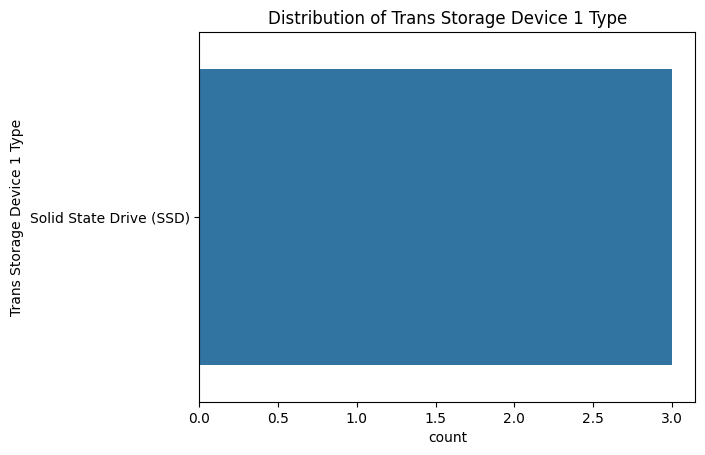


Value counts for Trans Storage Device 2 Type:
Series([], Name: count, dtype: int64)


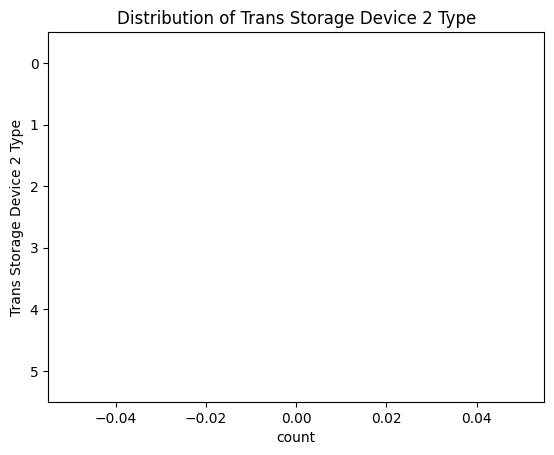


Value counts for Trans Automated Tiering Enabled During Testing Device 1:
Trans Automated Tiering Enabled During Testing Device 1
No     2
Yes    2
Name: count, dtype: int64


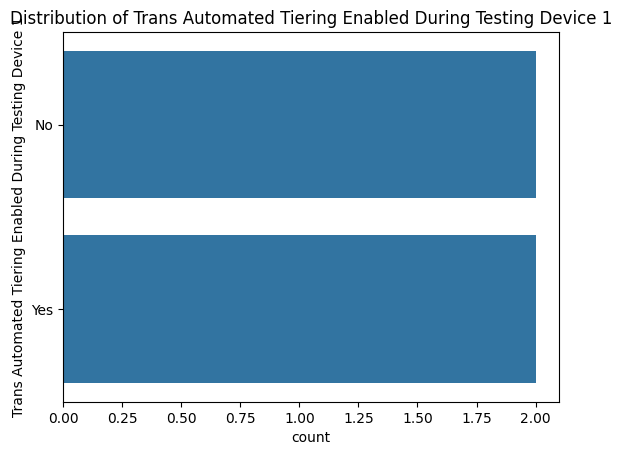


Value counts for Trans PSUs 80PLUS Certification:
Trans PSUs 80PLUS Certification
Platinum                                          19
Titanium                                           5
Platinum (Controller Chassis); Platinum (JBOD)     3
80+ Platinum                                       2
2000                                               1
Name: count, dtype: int64


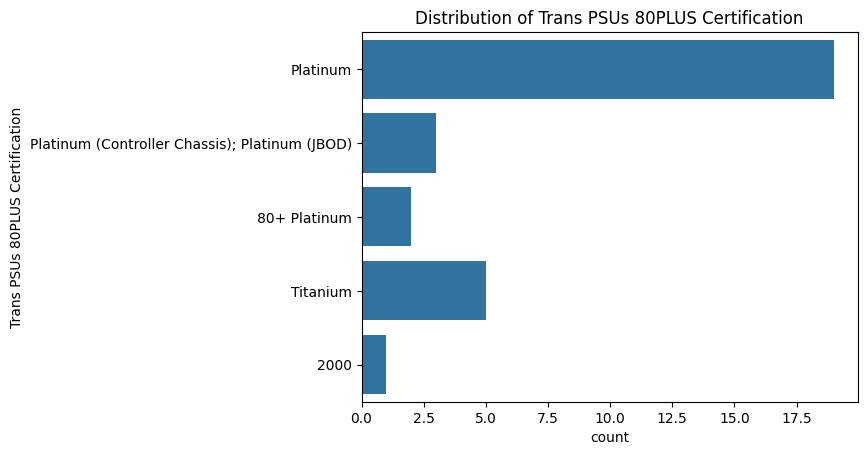


Value counts for Stream Storage Device 1 Type:
Stream Storage Device 1 Type
Hard Disk Drive (HDD)    6
Name: count, dtype: int64


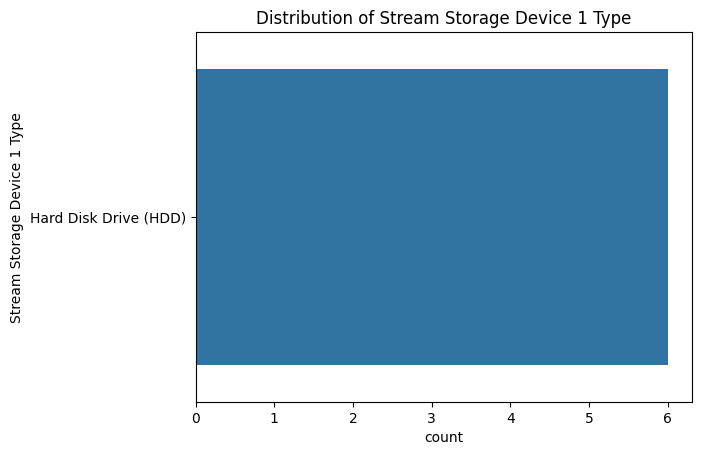


Value counts for Stream Storage Device 2 Type:
Stream Storage Device 2 Type
Hard Disk Drive (HDD)    4
Name: count, dtype: int64


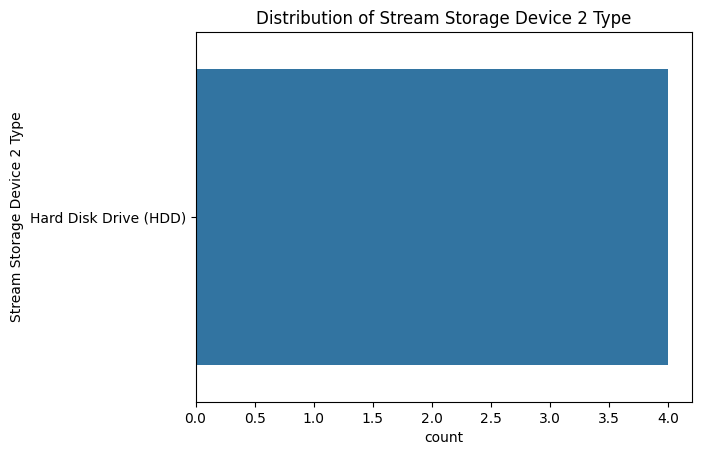


Value counts for Stream Automated Tiering Enabled During Testing Device 1:
Stream Automated Tiering Enabled During Testing Device 1
Yes    6
Name: count, dtype: int64


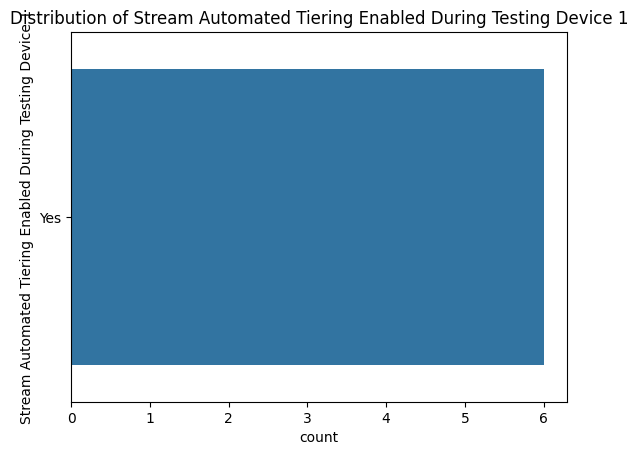


Value counts for Stream PSUs 80PLUS Certification:
Stream PSUs 80PLUS Certification
Gold        8
Platinum    3
Titanium    3
Name: count, dtype: int64


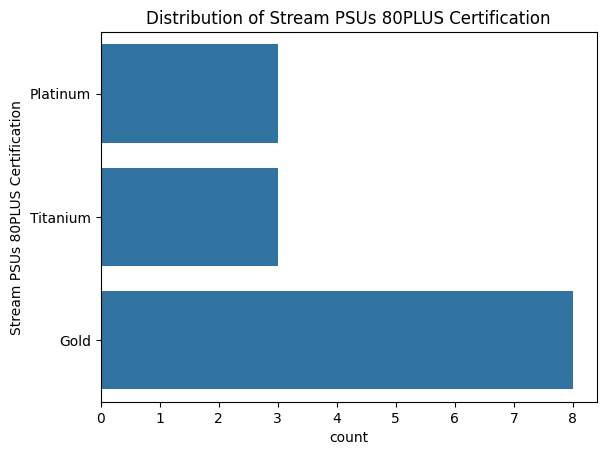

In [11]:
prefixes = ['Trans', 'Stream']
base_columns = [
    'Storage Device 1 Type', 
    'Storage Device 2 Type', 
    'Automated Tiering Enabled During Testing Device 1', 
    'PSUs 80PLUS Certification'
]

categorical_columns = [f"{prefix} {col}" for prefix in prefixes for col in base_columns]

for col in categorical_columns:
    print(f"\nValue counts for {col}:")
    print(data[col].value_counts())
    sns.countplot(y=data[col])
    plt.title(f"Distribution of {col}")
    plt.show()

In [12]:
# Comprehensive numerical column list
numerical_columns = [
    'Trans Storage Device 1 Rated Speed (RPM)', 
    'Trans Storage Device 2 Rated Speed (RPM)', 
    'Stream Storage Device 1 Rated Speed (RPM)', 
    'Stream Storage Device 2 Rated Speed (RPM)', 
    'Trans Storage Device 1 Raw Capacity (GB)', 
    'Trans Storage Device 2 Raw Capacity (GB)', 
    'Stream Storage Device 1 Raw Capacity (GB)', 
    'Stream Storage Device 2 Raw Capacity (GB)', 
    'Trans PSU Rated Output (W)', 
    'Stream PSU Rated Output (W)', 
    'Trans Optimal Point Hot Band Workload Test (IOPS/W)', 
    'Trans Optimal Point Random Read Workload Test (IOPS/W)', 
    'Trans Optimal Point Random Write Workload Test (IOPS/W)', 
    'Trans Optimal Point Ready Idle Workload Test (GB/W)', 
    'Stream Optimal Point Seq Read Workload Test (MiBPS/W)', 
    'Stream Optimal Point Seq Write Workload Test (MiBPS/W)', 
    'Stream Optimal Point Ready Idle Workload Test (GB/W)', 
    'Trans Total Amount of Cache (GB)', 
    'Stream Total Amount of Cache (GB)', 
    'Trans Num Devices Storage Device 1 Optimal Point', 
    'Trans Num Devices Storage Device 2 Optimal Point', 
    'Stream Num Devices Storage Device 1 Optimal Point', 
    'Stream Num Devices Storage Device 2 Optimal Point'
]

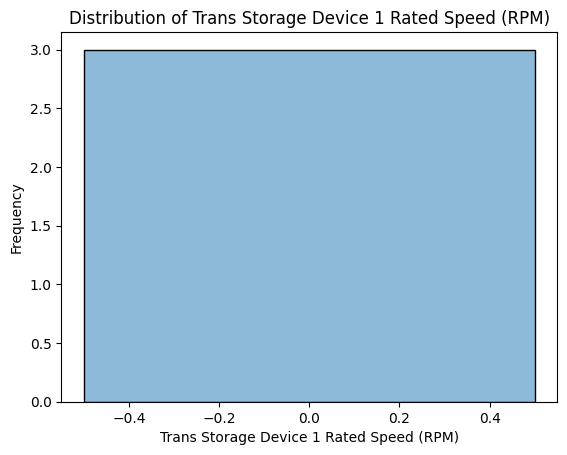

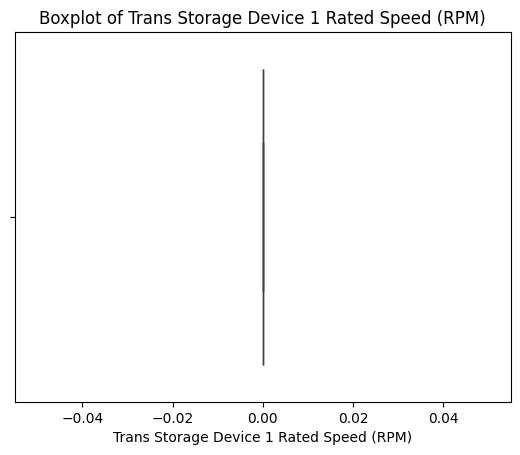

Column Trans Storage Device 2 Rated Speed (RPM) contains no valid numerical data for plotting.


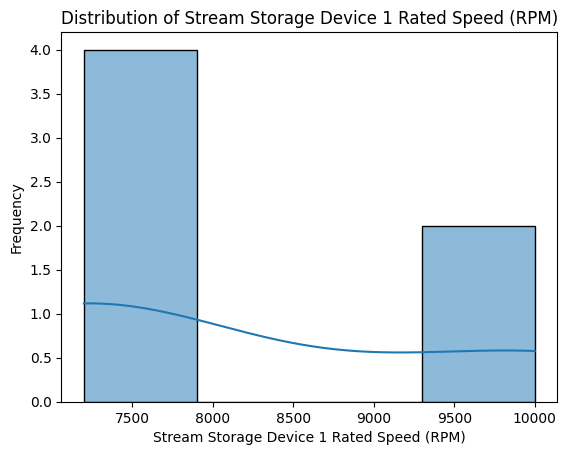

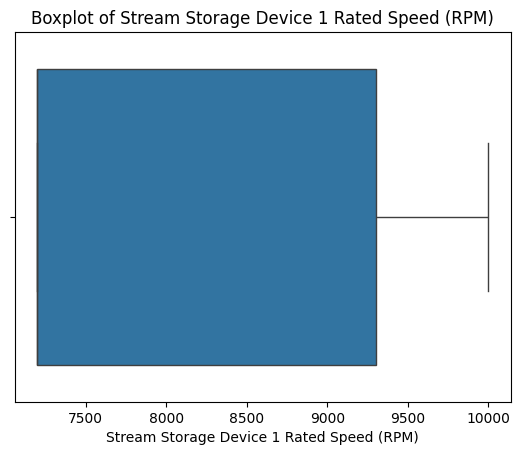

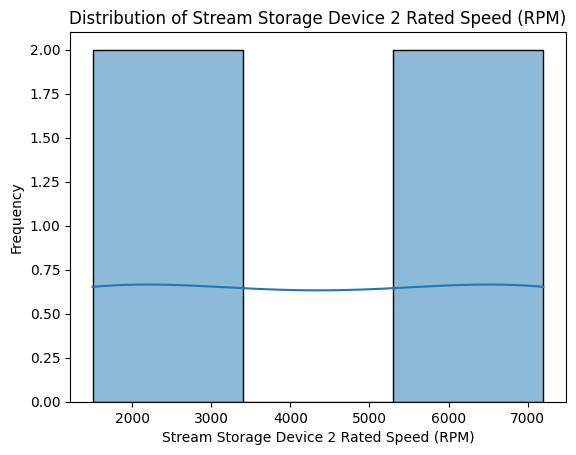

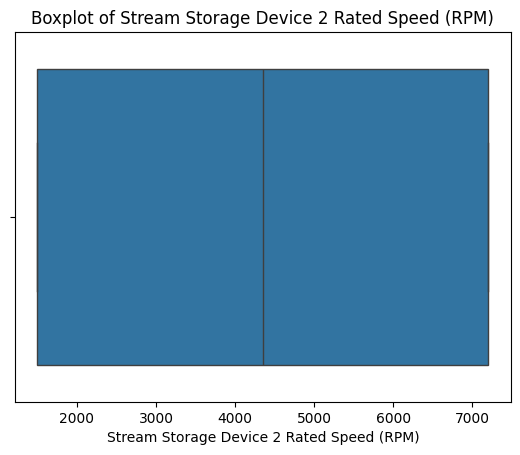

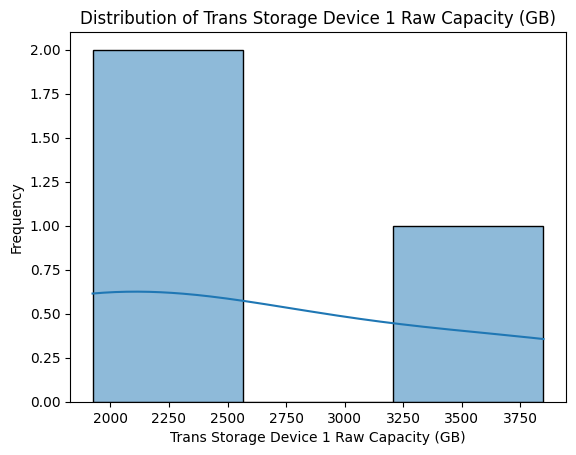

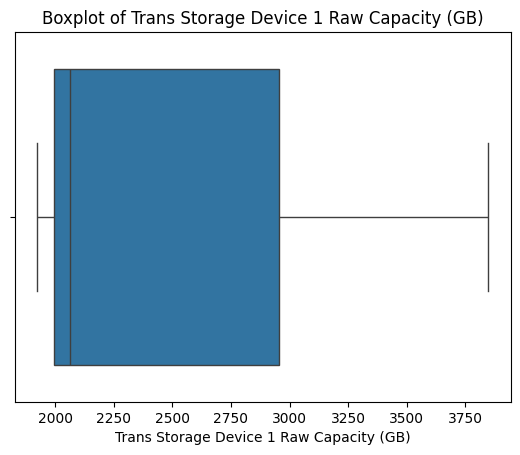

Column Trans Storage Device 2 Raw Capacity (GB) contains no valid numerical data for plotting.


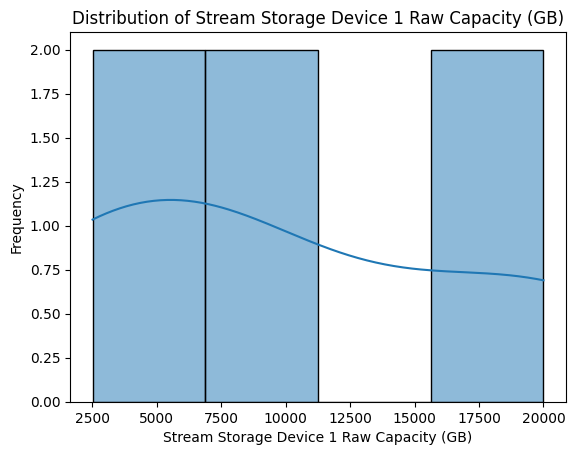

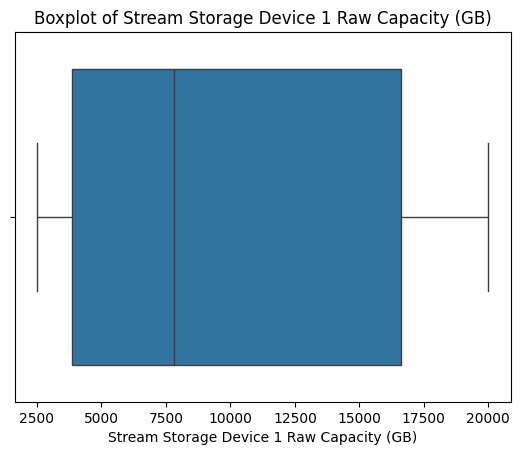

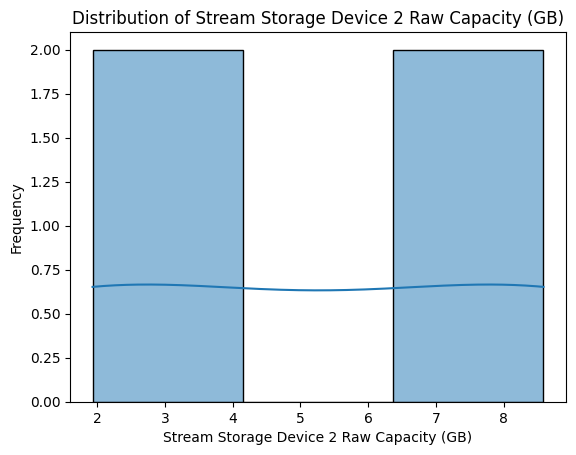

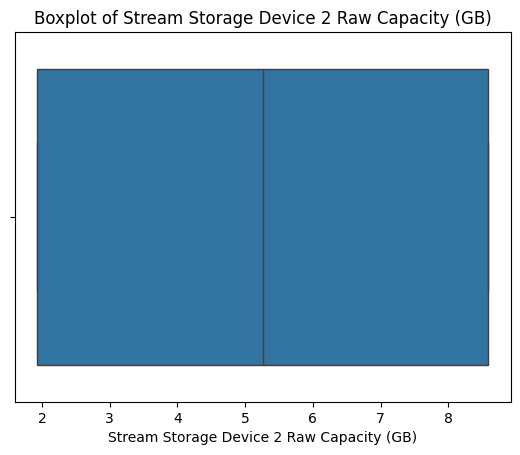

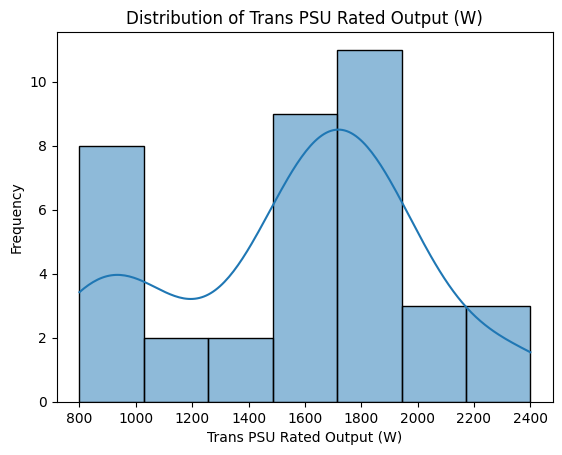

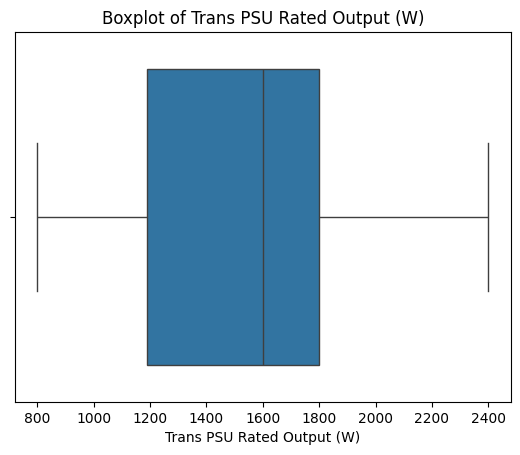

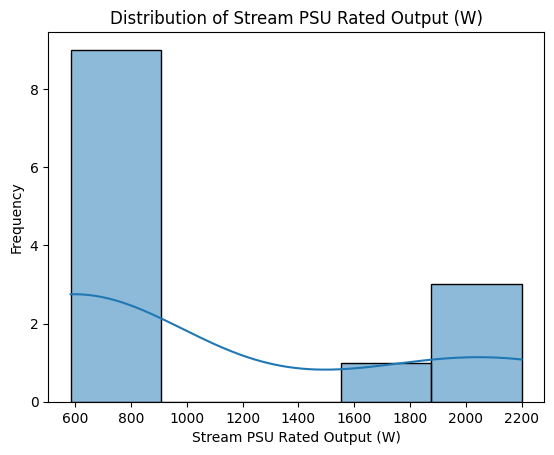

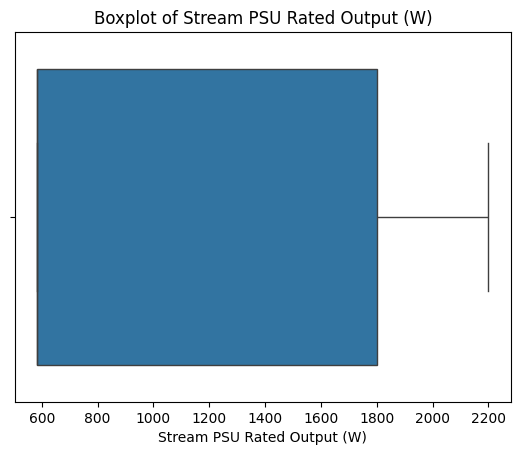

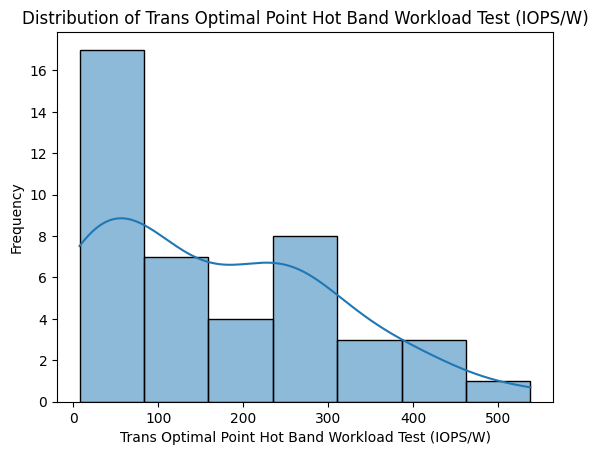

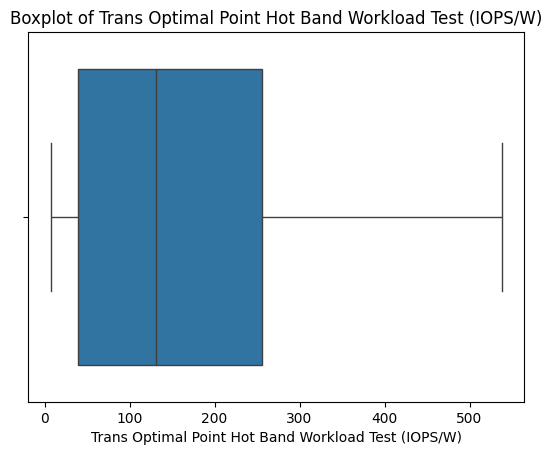

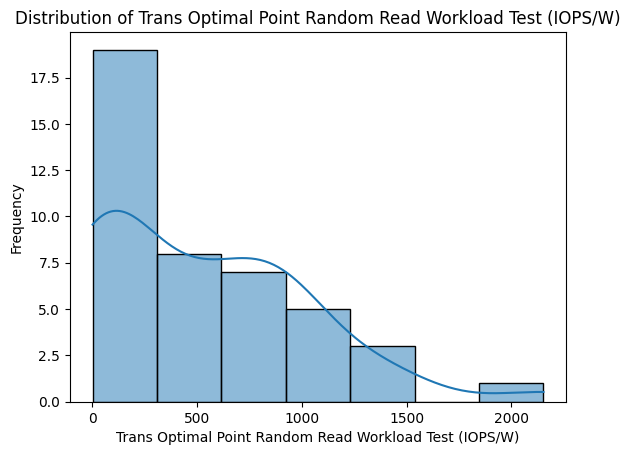

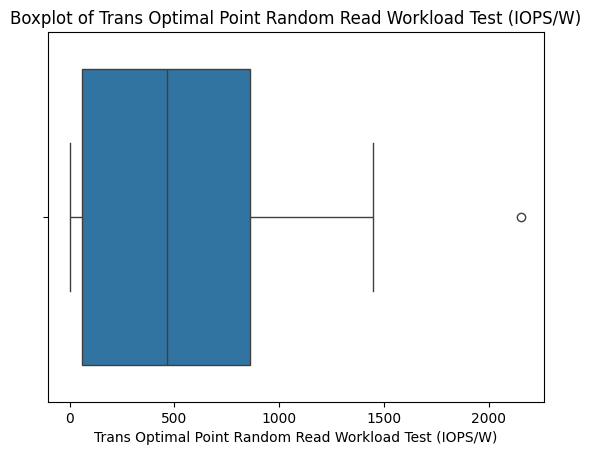

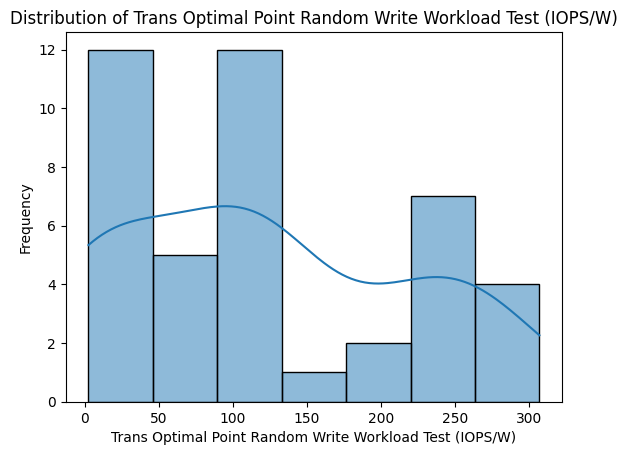

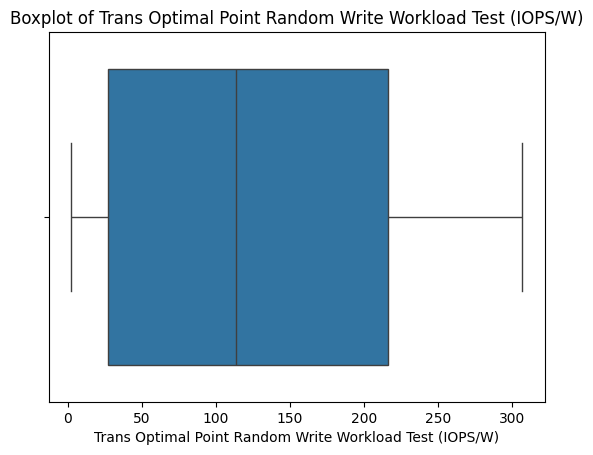

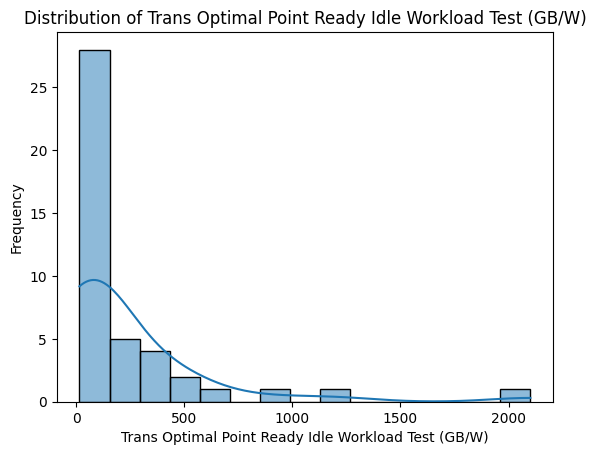

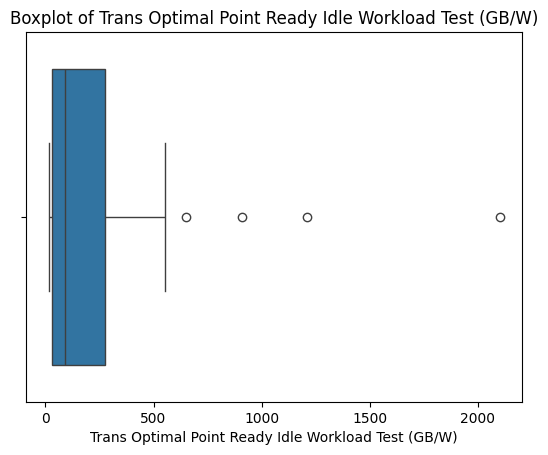

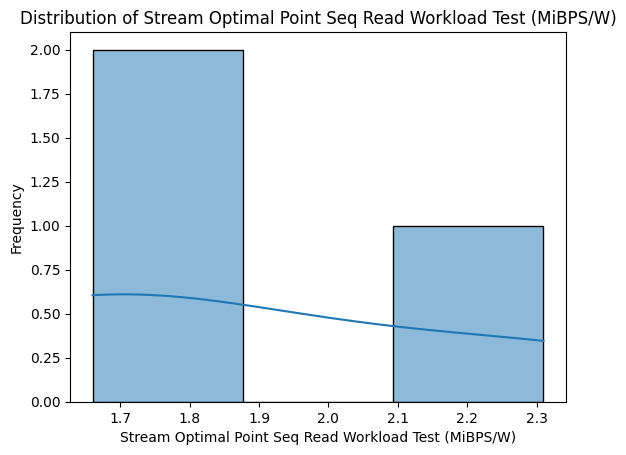

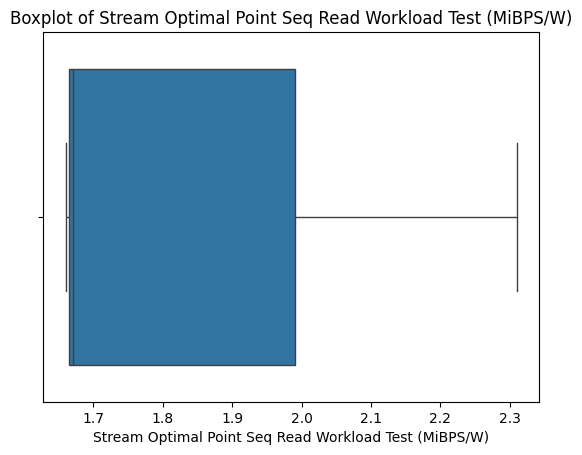

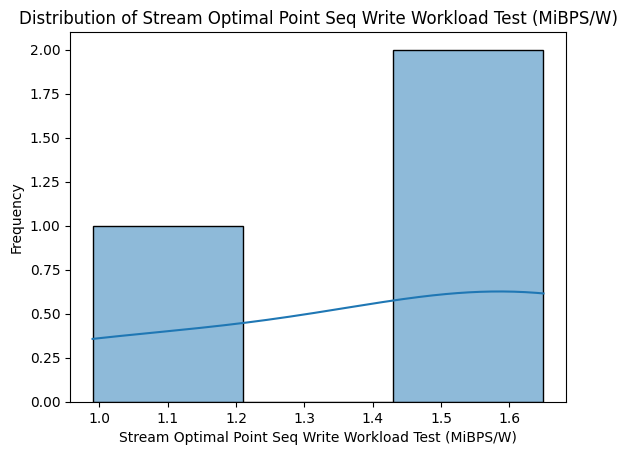

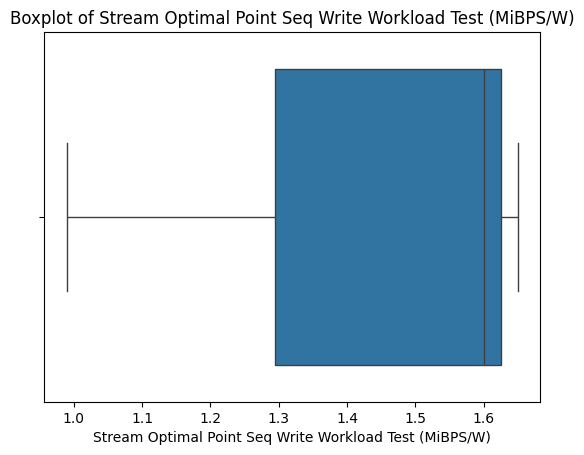

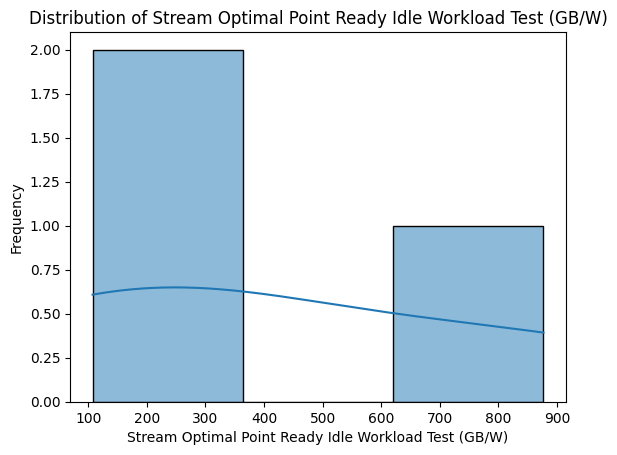

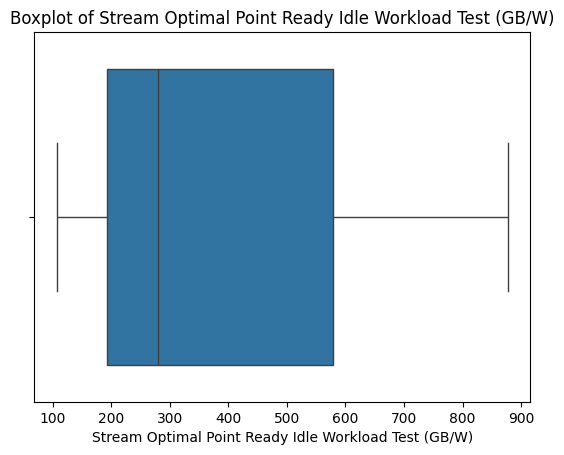

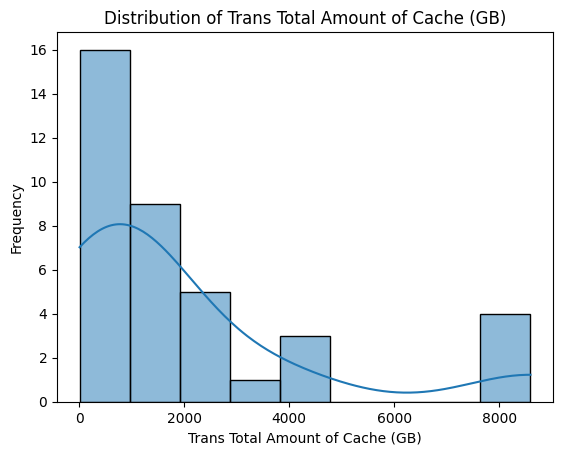

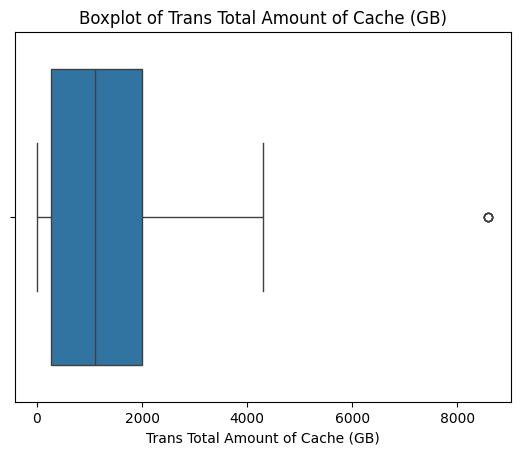

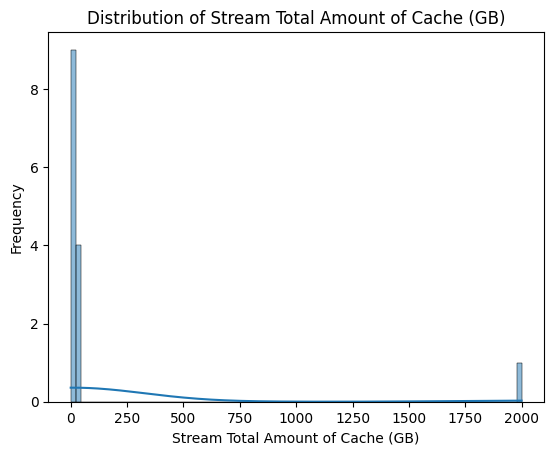

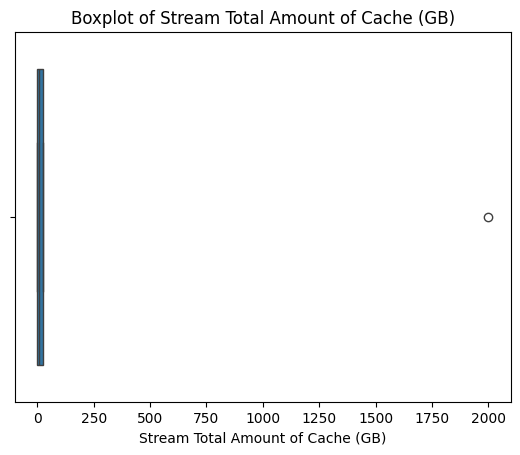

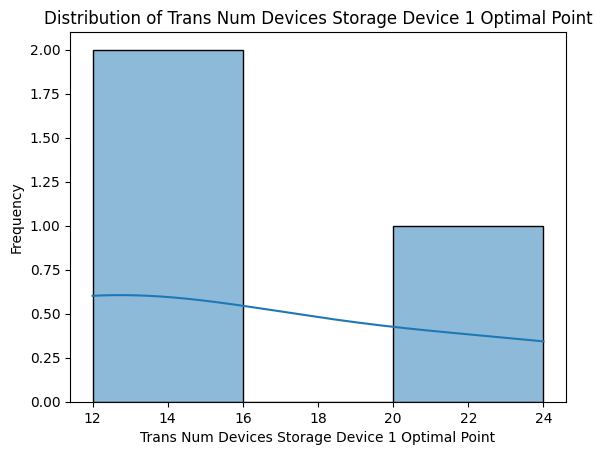

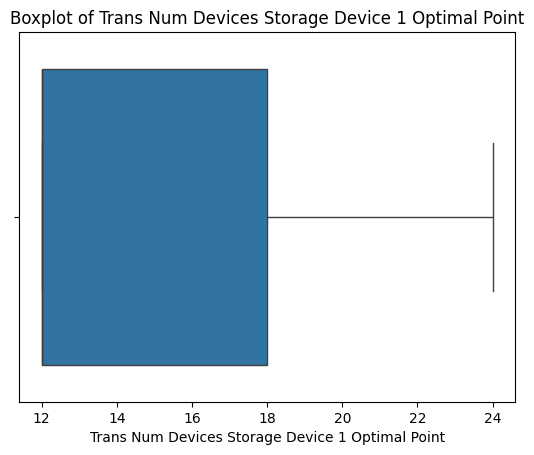

Column Trans Num Devices Storage Device 2 Optimal Point contains no valid numerical data for plotting.


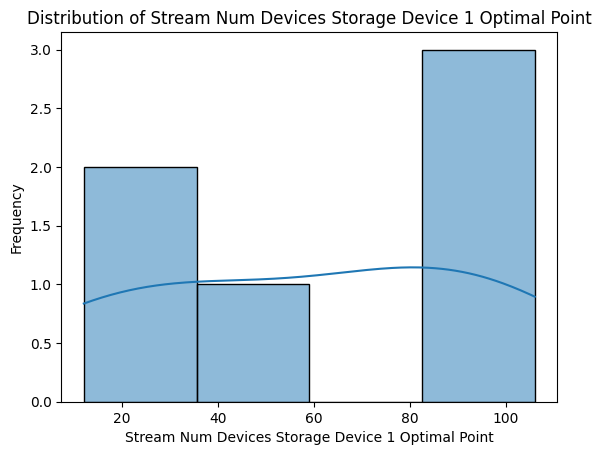

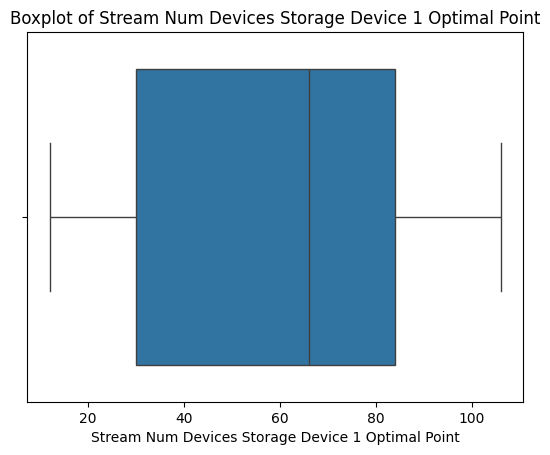

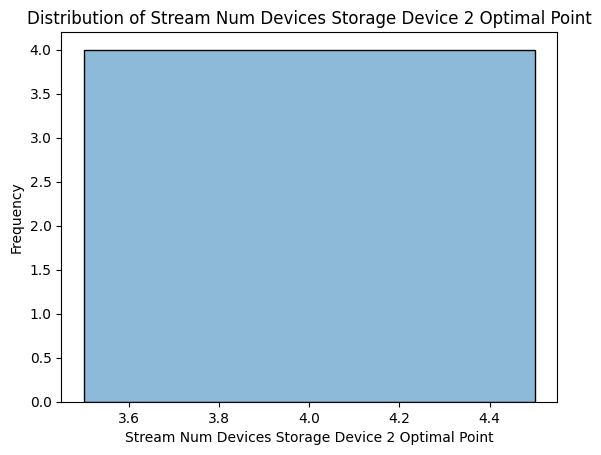

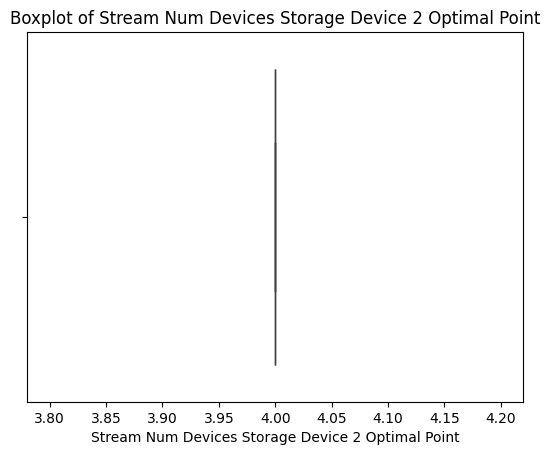

In [14]:
# Plot distributions and boxplots for each numerical column
for col in numerical_columns:
    if col in data.columns:  # Ensure the column exists in the dataset
        # Drop NaNs and ensure column is numeric
        numerical_data = pd.to_numeric(data[col], errors='coerce').dropna()

        if len(numerical_data) > 0:  # Ensure there is data to plot
            sns.histplot(numerical_data, kde=True)
            plt.title(f"Distribution of {col}")
            plt.xlabel(col)
            plt.ylabel('Frequency')
            plt.show()

            sns.boxplot(x=numerical_data)
            plt.title(f"Boxplot of {col}")
            plt.show()
        else:
            print(f"Column {col} contains no valid numerical data for plotting.")
    else:
        print(f"Column {col} is not present in the DataFrame.")

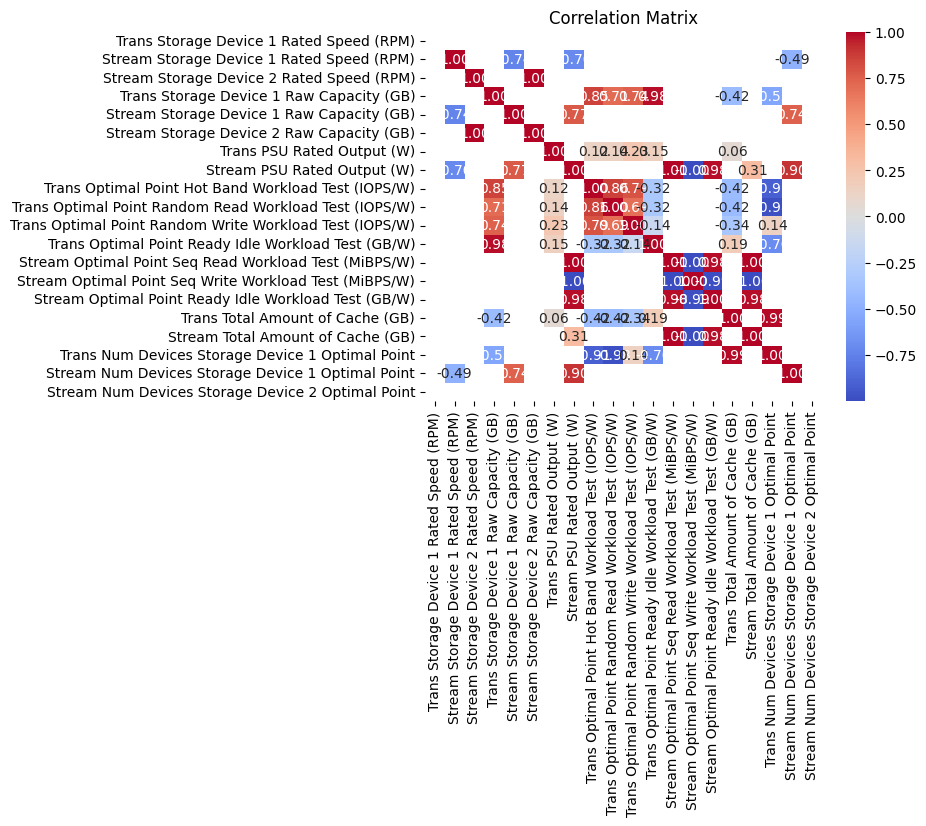

In [16]:
# Clean numerical columns
cleaned_numerical_data = data[numerical_columns].apply(
    lambda col: pd.to_numeric(col, errors='coerce')
)

# Drop columns that are entirely NaN after conversion
valid_numerical_data = cleaned_numerical_data.dropna(axis=1, how='all')

# Calculate correlation on valid numerical data
if not valid_numerical_data.empty:
    correlation = valid_numerical_data.corr()
    sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix")
    plt.show()
else:
    print("No valid numerical data available for correlation matrix.")


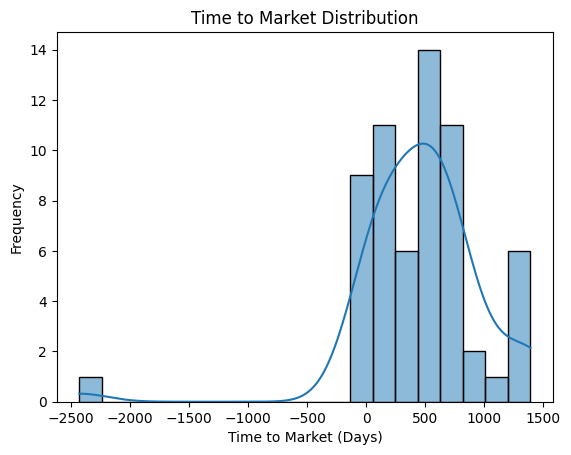

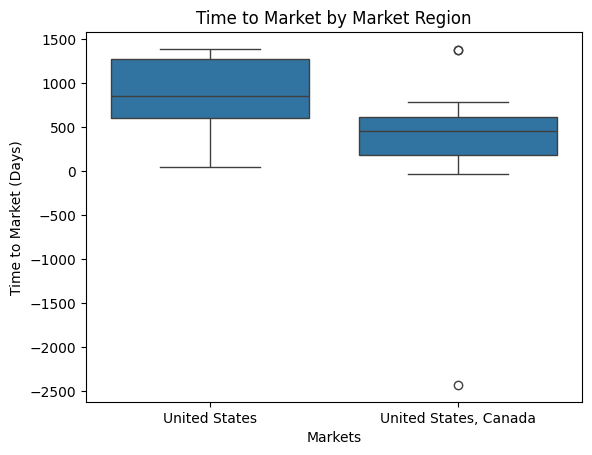

In [18]:
# Ensure date columns exist
if 'Date Available On Market' in data.columns and 'Date Qualified' in data.columns:
    # Convert to datetime
    data['Date Available On Market'] = pd.to_datetime(data['Date Available On Market'], errors='coerce')
    data['Date Qualified'] = pd.to_datetime(data['Date Qualified'], errors='coerce')
    
    # Drop rows with invalid dates
    data = data.dropna(subset=['Date Available On Market', 'Date Qualified'])
    
    # Calculate Time to Market
    data['Time to Market (Days)'] = (data['Date Qualified'] - data['Date Available On Market']).dt.days
    
    # Plot Time to Market Distribution
    sns.histplot(data['Time to Market (Days)'], kde=True, bins=20)
    plt.title("Time to Market Distribution")
    plt.xlabel("Time to Market (Days)")
    plt.ylabel("Frequency")
    plt.show()

    # Plot Time to Market by Markets (if exists)
    if 'Markets' in data.columns:
        sns.boxplot(x='Markets', y='Time to Market (Days)', data=data)
        plt.title("Time to Market by Market Region")
        plt.xlabel("Markets")
        plt.ylabel("Time to Market (Days)")
        plt.show()
else:
    print("Required date columns are not present in the dataset.")


In [28]:
# Function to clean non-numeric values from columns with numeric data
def clean_numeric_column(column):
    # Remove non-numeric characters and convert to numeric
    column = column.replace(r'[^0-9.]', '', regex=True)
    return pd.to_numeric(column, errors='coerce')

# Insights from Exploratory Data Analysis
def generate_insights(data):
    insights = {}

    # 1. Product Distribution and Diversity
    if 'Brand Name' in data.columns:
        top_brands = data['Brand Name'].value_counts().head(5)
        insights['Top Brands'] = top_brands
        print("\nTop 5 Brands by Product Count:\n", top_brands)
        print("----------------------------------------------------------")
        
    if 'Product Type' in data.columns:
        product_distribution = data['Product Type'].value_counts()
        insights['Product Type Distribution'] = product_distribution
        print("\nProduct Type Distribution:\n", product_distribution)
        print("----------------------------------------------------------")

    # 2. Performance Metrics (These relate to efficiency and performance under different workloads)
    performance_cols = [
        'Trans Optimal Point Hot Band Workload Test (IOPS/W)', 
        'Trans Optimal Point Random Read Workload Test (IOPS/W)', 
        'Trans Optimal Point Random Write Workload Test (IOPS/W)', 
        'Stream Optimal Point Seq Read Workload Test (MiBPS/W)', 
        'Stream Optimal Point Seq Write Workload Test (MiBPS/W)', 
        'Stream Optimal Point Ready Idle Workload Test (GB/W)'
    ]
    
    for col in performance_cols:
        if col in data.columns:
            max_value = data[col].max()
            min_value = data[col].min()
            mean_value = data[col].mean()
            insights[f"{col} Stats"] = {'Max': max_value, 'Min': min_value, 'Mean': mean_value}
            print(f"\n{col} - Max: {max_value}, Min: {min_value}, Mean: {mean_value}")
            print("----------------------------------------------------------")

    # 3. Energy Efficiency (Energy consumption, PSU rated output, certification)
    if 'Trans PSU Rated Output (W)' in data.columns:
        # Clean the column to remove non-numeric characters and convert to numeric
        data['Trans PSU Rated Output (W)'] = clean_numeric_column(data['Trans PSU Rated Output (W)'])
        avg_power_output = data['Trans PSU Rated Output (W)'].mean()
        insights['Average Power Output'] = avg_power_output
        print("\nAverage Rated Output (W):", avg_power_output)
        print("----------------------------------------------------------")
        
    if 'Trans PSUs 80PLUS Certification' in data.columns:
        certification_distribution = data['Trans PSUs 80PLUS Certification'].value_counts()
        insights['80PLUS Certification Distribution'] = certification_distribution
        print("\n80PLUS Certification Distribution:\n", certification_distribution)
        print("----------------------------------------------------------")

    # 4. Capacity and Storage (Usage capacity, installed devices)
    if 'Trans Storage Device 1 Raw Capacity (GB)' in data.columns:
        max_capacity = data['Trans Storage Device 1 Raw Capacity (GB)'].max()
        avg_capacity = data['Trans Storage Device 1 Raw Capacity (GB)'].mean()
        insights['Storage Device 1 Capacity Stats'] = {'Max': max_capacity, 'Average': avg_capacity}
        print("\nTrans Storage Device 1 Raw Capacity (GB) - Max:", max_capacity, "Average:", avg_capacity)
        print("----------------------------------------------------------")
    
    if 'Trans Installed Solid State Devices in Optimal Point' in data.columns and \
       'Trans Installed Rotational Devices in Optimal Point' in data.columns:
        ssd_count = data['Trans Installed Solid State Devices in Optimal Point'].sum()
        hdd_count = data['Trans Installed Rotational Devices in Optimal Point'].sum()
        insights['SSD vs HDD'] = {'SSD': ssd_count, 'HDD': hdd_count}
        print("\nTotal Installed Solid State Devices (SSD):", ssd_count)
        print("Total Installed Rotational Devices (HDD):", hdd_count)
        print("----------------------------------------------------------")

    # 5. Time to Market (Time-to-market insights for products)
    if 'Time to Market (Days)' in data.columns:
        avg_time_to_market = data['Time to Market (Days)'].mean()
        max_time_to_market = data['Time to Market (Days)'].max()
        min_time_to_market = data['Time to Market (Days)'].min()
        insights['Time to Market Stats'] = {
            'Average': avg_time_to_market,
            'Max': max_time_to_market,
            'Min': min_time_to_market
        }
        print("\nTime to Market (Days) - Average:", avg_time_to_market,
              "Max:", max_time_to_market, "Min:", min_time_to_market)
        print("----------------------------------------------------------")
    return insights

# Run the insights generation function
dataset_insights = generate_insights(data)

# Display all insights
# print("\nSummary of Insights:\n", dataset_insights)



Top 5 Brands by Product Count:
 Brand Name
DELL                           10
HPE                             7
IBM                             7
Hitachi Vantara                 6
Lenovo (United States) Inc.     5
Name: count, dtype: int64
----------------------------------------------------------

Product Type Distribution:
 Product Type
NVSS Disk Set Online 4    25
Disk Set Online 2         17
Disk Set Online 3         10
Disk Set Online 4          6
NVSS Disk Set Online 2     2
NVSS Disk Set Online 3     1
Name: count, dtype: int64
----------------------------------------------------------

Trans Optimal Point Hot Band Workload Test (IOPS/W) - Max: 537.8, Min: 7.2, Mean: 167.59697674418604
----------------------------------------------------------

Trans Optimal Point Random Read Workload Test (IOPS/W) - Max: 2153.1, Min: 2.5, Mean: 521.8976744186047
----------------------------------------------------------

Trans Optimal Point Random Write Workload Test (IOPS/W) - Max: 306.98, Min